In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv('CS98XClassificationTrain.csv')
df_test = pd.read_csv('CS98XClassificationTest.csv')

In [3]:
df_train.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [4]:
df_train.isna().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [5]:
df_train.dropna(inplace=True)

In [6]:
df_train.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
5,6,Grenade,Bruno Mars,2010,110,56,71,-7,12,23,223,15,6,74,pop


In [7]:
df_test.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44


In [8]:
df_train['artist'].value_counts()

Elton John     9
Queen          7
ABBA           7
The Beatles    6
Rihanna        5
              ..
Paul Young     1
Keri Hilson    1
Four Tops      1
La Bouche      1
*NSYNC         1
Name: artist, Length: 331, dtype: int64

In [9]:
df_train['top genre'].value_counts()

adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
bow pop                1
australian rock        1
boogaloo               1
british comedy         1
alternative rock       1
Name: top genre, Length: 86, dtype: int64

In [10]:
df_train = df_train.drop('Id',axis=1)
df_train = df_train.drop('title',axis=1)


df_test = df_test.drop('Id',axis=1)
df_test = df_test.drop('title',axis=1)

In [11]:
df_train.head()

,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
2,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
5,Bruno Mars,2010,110,56,71,-7,12,23,223,15,6,74,pop


In [12]:
df_test.head()

,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44


In [13]:
df_train['top genre'].value_counts()

adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
bow pop                1
australian rock        1
boogaloo               1
british comedy         1
alternative rock       1
Name: top genre, Length: 86, dtype: int64

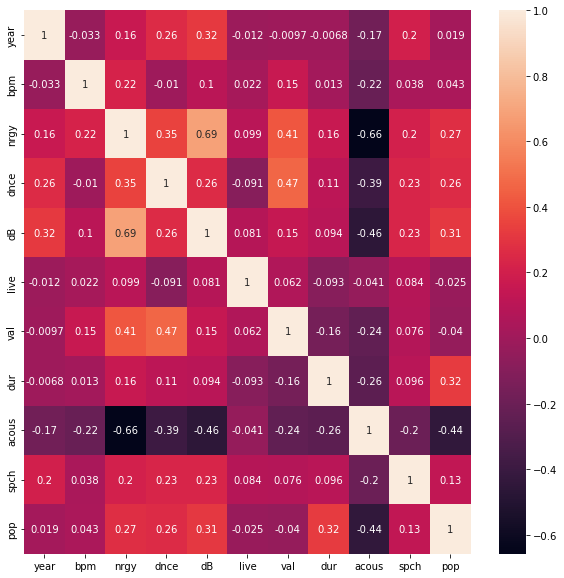

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [15]:
df_train = df_train.drop('live',axis=1)
df_train = df_train.drop('val',axis=1)
df_train = df_train.drop('acous',axis=1)

df_test = df_test.drop('live',axis=1)
df_test = df_test.drop('val',axis=1)
df_test = df_test.drop('acous',axis=1)

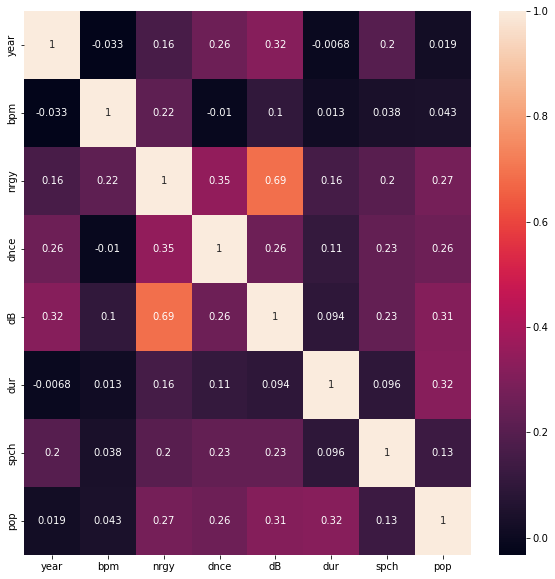

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['top genre'] = le.fit_transform(df_train['top genre'])
df_train['artist'] = le.fit_transform(df_train['artist'])

In [18]:
df_train.head()

,artist,year,bpm,nrgy,dnce,dB,dur,spch,pop,top genre
0,54,1996,107,31,45,-8,150,3,44,1
2,19,1979,105,36,63,-9,245,3,77,1
3,18,1980,170,28,47,-16,232,3,67,1
4,92,1973,121,47,56,-8,193,3,63,68
5,40,2010,110,56,71,-7,223,6,74,80


In [19]:
X = df_train.drop('top genre',axis=1)
y = df_train['top genre']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train)


X_Strain = standard_scaler.transform(X_train)
X_Stest = standard_scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_depth=1, random_state=42)
clf.fit(X_Strain,y_train)
clf_pred = clf.predict(X_Stest)

In [24]:
accuracy_score(y_test,clf_pred)

0.06818181818181818

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_Strain,y_train)
gnb_pred = gnb.predict(X_Stest)
accuracy_score(y_test,gnb_pred)

0.29545454545454547

In [26]:
#lrc = LogisticRegression(multi_class='ovr')
svc = SVC()
rfc = RandomForestClassifier(random_state=42,min_samples_split=5)
dtc = DecisionTreeClassifier(random_state=42)

In [27]:
voting_clf = VotingClassifier(estimators=[('rf', rfc), ('svc', svc),('dt',dtc)],voting='hard')
voting_clf.fit(X_Strain,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(min_samples_split=5,
                                                     random_state=42)),
                             ('svc', SVC()),
                             ('dt', DecisionTreeClassifier(random_state=42))])

In [28]:

for clf in (rfc, svc,dtc, voting_clf):
    clf.fit(X_Strain, y_train)
    ypred = clf.predict(X_Stest)
    print(clf.__class__.__name__, accuracy_score(y_test, ypred))

RandomForestClassifier 0.45454545454545453
SVC 0.4090909090909091
DecisionTreeClassifier 0.20454545454545456
VotingClassifier 0.4318181818181818
